### Nano Degree
## Project 1 - Blog Post

Putting the packages import cell first, you can see that I had some trouble with a couple of the ones I wanted to use due to using a corporate environment where the packages aren't fully up to date.<br>
I do have the ability to update but I am going to hold off until I can check that it won't impact my ability to use our spark cluster!

In [1]:
# importing some packages for EDA and modelling
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
#from sklearn.metrics import mean_absolute_percentage_error - can't use this as our version of sklearn isn't new enough? define own instead
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
import geopandas as gpd
#import geoplot as gplt - get errors when I try this, due to python version 3.6 - is it safe to upgrade to 3.7 or will that break my spark?

In [ ]:
# defining useful functions

# can't use sklearn mean_absolute_percentage_error so have to define own
def mape(a, b): 
    """If you can't use latest version of sklearn which has an inbuilt Mean Absolute Percentage Error,
    then this function calculates it for you. It can handle where divisor is 0 and ignore these.
    Inputs: a,b where a is the actual values and b is the predictions
    Outputs: Mean Absolute Percentage Error as an integer"""
    mask = a != 0
    return np.mean(np.abs((a - b) / a)[mask]) * 100

Let's find out what AirBnB data shows about my city of birth, Edinburgh!<br>
The first stage is to import the data, eyeball it and think about what questions I might want to use it to answer.<br>

### Data Understanding 1.1 - read in files

In [2]:
## these files are the summary files - where there were two files with the same name, I added "1" suffix to the summary versions
df_listings1 = pd.read_csv('listings1.csv')
df_neighbourhoods = pd.read_csv('neighbourhoods1.csv')
df_reviews1 = pd.read_csv('reviews1.csv')

## these files are the detailed files, I unzipped them first in Linux command line (see README)
df_cal = pd.read_csv('calendar.csv')
df_listings = pd.read_csv('listings.csv')
df_reviews = pd.read_csv('reviews.csv')

### Data Understanding 1.2 - use head() to view the top 5 rows of each file and describe() to get summary statistics

In [2]:
df_listings1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,15420,Georgian Boutique Apt City Centre,60423,Charlotte,NaN,"Old Town, Princes Street and Leith Street",55.95759,-3.18805,Entire home/apt,100,3,345,2020-08-28,5.35,1,151
1,24288,"Cool central Loft, sleeps 4, 2 double bed+en-s...",46498,Gordon,NaN,"Canongate, Southside and Dumbiedykes",55.94383,-3.18445,Entire home/apt,95,3,219,2019-09-08,1.95,1,25
2,38628,Edinburgh Holiday Let,165635,Trish,NaN,Joppa,55.94215,-3.09640,Entire home/apt,55,4,57,2018-08-27,0.98,2,298
3,44009,"Very Spacious, Well Lit, Double Room, Very Cen...",192586,Puneet,NaN,Marchmont West,55.93800,-3.19468,Private room,45,2,38,2013-07-22,0.29,1,87
4,44552,Double room - spacious Leith flat,195950,Shaun,NaN,South Leith,55.96612,-3.17184,Private room,31,2,200,2019-09-12,1.68,2,75


In [3]:
df_neighbourhoods.head()

,neighbourhood_group,neighbourhood
0,NaN,Abbeyhill
1,NaN,Baberton and Juniper Green
2,NaN,Balerno and Bonnington Village
3,NaN,Balgreen and Roseburn
4,NaN,"Barnton, Cammo and Cramond South"


In [4]:
df_neighbourhoods.describe(include='all') # doesn't look like this adds any value as all of neighbourhood_group is missing values

,neighbourhood_group,neighbourhood
count,0.0,111
unique,NaN,111
top,NaN,"Barnton, Cammo and Cramond South"
freq,NaN,1
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN


In [4]:
df_reviews1.head()

,listing_id,date
0,15420,2011-01-18
1,15420,2011-01-31
2,15420,2011-04-19
3,15420,2011-04-23
4,15420,2011-05-15


In [5]:
df_cal.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2852317,2021-07-10,f,$40.00,$40.00,2,1125
1,170756,2021-07-10,f,$53.00,$53.00,2,180
2,170756,2021-07-11,f,$54.00,$54.00,1,180
3,170756,2021-07-12,f,$53.00,$53.00,1,180
4,170756,2021-07-13,f,$53.00,$53.00,1,180


In [6]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,15420,https://www.airbnb.com/rooms/15420,20210710030835,2021-07-10,Georgian Boutique Apt City Centre,"Stunning, impeccably refurbished spacious grou...","The neighbourhood is in the historic New Town,...",https://a0.muscache.com/pictures/cf69631f-4194...,60423,https://www.airbnb.com/users/show/60423,...,4.98,4.98,4.90,NaN,f,1,1,0,0,5.35
1,24288,https://www.airbnb.com/rooms/24288,20210710030835,2021-07-10,"Cool central Loft, sleeps 4, 2 double bed+en-s...",Upper level of duplex. Boho rustic-chic former...,It's all in the mix: Culture-museums and galle...,https://a0.muscache.com/pictures/3460007/88731...,46498,https://www.airbnb.com/users/show/46498,...,4.89,4.85,4.60,NaN,t,1,1,0,0,1.95
2,38628,https://www.airbnb.com/rooms/38628,20210710030835,2021-07-10,Edinburgh Holiday Let,Brunstane - Daiches Braes (close to Portobello...,Quiet and easy access to outside.,https://a0.muscache.com/pictures/d9885120-178e...,165635,https://www.airbnb.com/users/show/165635,...,4.87,4.84,4.84,NaN,t,2,2,0,0,0.98
3,44009,https://www.airbnb.com/rooms/44009,20210710030835,2021-07-10,"Very Spacious, Well Lit, Double Room, Very Cen...","Imagine living in a beautiful, well lit, very ...",The flat is very central. It is 2mins from the...,https://a0.muscache.com/pictures/35cda67b-f2a0...,192586,https://www.airbnb.com/users/show/192586,...,4.73,4.67,4.63,NaN,f,1,0,1,0,0.29
4,44552,https://www.airbnb.com/rooms/44552,20210710030835,2021-07-10,Double room - spacious Leith flat,Pleasant double room in 2 bedroom ground floor...,NaN,https://a0.muscache.com/pictures/454814/0e351a...,195950,https://www.airbnb.com/users/show/195950,...,4.84,4.58,4.72,NaN,f,2,0,2,0,1.68


In [7]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,15420,171793,2011-01-18,186358,Nels,My wife and I stayed at this beautiful apartme...
1,15420,176350,2011-01-31,95218,Gareth,Charlotte couldn't have been a more thoughtful...
2,15420,232149,2011-04-19,429751,Guido,I went to Edinburgh for the second time on Apr...
3,15420,236073,2011-04-23,420830,Mariah,This flat was incredible. As other guests have...
4,15420,263713,2011-05-15,203827,Linda,Fantastic host and the apartment was perfect. ...


### Data Understanding 1.3 - Exploratory Data Analysis on Listings Summary data

In [47]:
df_listings1.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                           80
neighbourhood_group               6634
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1068
reviews_per_month                 1068
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [14]:
df_listings1.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,6.634000e+03,6634,6.634000e+03,6554,0.0,6634,6634.000000,6634.000000,6634,6634.000000,6634.000000,6634.000000,5566,5566.000000,6634.000000,6634.000000
unique,NaN,6555,NaN,1773,NaN,111,NaN,NaN,4,NaN,NaN,NaN,1115,NaN,NaN,NaN
top,NaN,Mono Suites - One Bedroom Suite,NaN,James,NaN,"Old Town, Princes Street and Leith Street",NaN,NaN,Entire home/apt,NaN,NaN,NaN,2020-01-02,NaN,NaN,NaN
freq,NaN,7,NaN,210,NaN,765,NaN,NaN,4375,NaN,NaN,NaN,101,NaN,NaN,NaN
mean,2.641679e+07,NaN,1.156050e+08,NaN,NaN,NaN,55.950456,-3.198222,NaN,144.704402,4.853482,56.100844,NaN,1.701010,12.283087,155.290473
std,1.465081e+07,NaN,1.169969e+08,NaN,NaN,NaN,0.015453,0.037759,NaN,523.968883,33.740421,89.226018,NaN,2.222943,33.322392,131.474545
min,1.542000e+04,NaN,3.629800e+04,NaN,NaN,NaN,55.858160,-3.418760,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,1.434876e+07,NaN,2.092327e+07,NaN,NaN,NaN,55.942475,-3.211848,NaN,55.000000,1.000000,2.000000,NaN,0.370000,1.000000,29.000000
50%,2.635944e+07,NaN,6.828647e+07,NaN,NaN,NaN,55.951005,-3.193375,NaN,85.000000,2.000000,19.000000,NaN,1.090000,2.000000,127.000000
75%,3.771678e+07,NaN,1.897102e+08,NaN,NaN,NaN,55.959930,-3.178385,NaN,133.000000,3.000000,74.000000,NaN,2.410000,5.000000,293.000000


In [22]:
df_listings1['id'].nunique() # how many unique listings are there? 6,634 - so data set is one row per listing

6634

In [23]:
df_listings1['host_id'].nunique() # belonging to 4,036 unique hosts

4036

### Business Understanding 1.1 - brainstorming business questions to address
<b>Here are some potentially interesting questions I could answer using this data:<b><br>
- How many properties are available to rent?<br>
- How many hosts are letting them?<br>
- Number of properties per host - are people just letting their flat while they are away(casual letting, pocket money)? or do some people own a load of properties to let out and make income from (small business, income stream)?<br>
- What parts of the city have the most listings? (can I map this to show visually?)<br>
- What's the most popular room type?<br>
- What's the most popular min/max stays (advertised)?<br>
- What price range are the listings - and how does this relate to neighbourhood/room type?<br>
- Is there seasonality in Edinburgh bookings? (my gut says August and Hogmanay will be most popular times...) - does this link to pricing? (again, I'd expect peak times to be most expensive)<br>
- What words are most commonly used to describe lettings (by hosts)?<br>
- Do reviewers agree/what words do they use? - sentiment analysis? - should Air BnB have this as a tool for hosts/visitors? select properties based on certain words/themes e.g. trendy vs historical etc.<br>
- If I had a property in Edinburgh, how would I price it? Can I build a predictive model that predicts price based on property listing details? -- should AirBnB have this as a tool for hosts?<br>
- What is the range of review scores, and what influences score? Can I build a predictive model that predicts score based on property listing details? -- should AirBnB have a tool for hosts to help them improve their scores?<br>


### Business Understanding 1.2 - answering analysis questions on the listings data

<b>Let's chart how many listings per host, I expect most hosts only have one...<b>

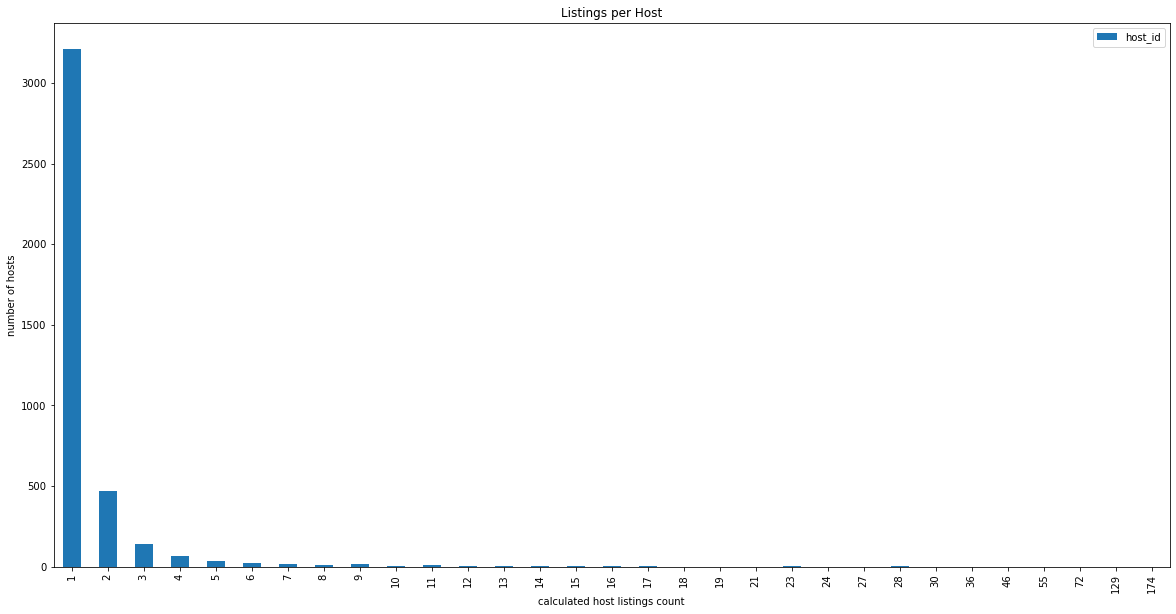

In [5]:
listings_per_host = df_listings1[['host_id','calculated_host_listings_count']].groupby('calculated_host_listings_count').nunique()
listings_per_host.reset_index(drop=False, inplace=True)
listings_per_host.plot(x='calculated_host_listings_count', y='host_id', kind='bar', figsize=(20,10))
plt.title('Listings per Host')
plt.xlabel('calculated host listings count')
plt.ylabel('number of hosts')
plt.show()


About three quarters of hosts only have one listing but there are a chunk with 2 and some outliers with over 100!

<b>Let's look at the most and least popular neighbourhoods to be listed:<b>

In [35]:
df_listings1[['neighbourhood','id']].groupby('neighbourhood').count().sort_values(by='id', ascending=False).head(10) 

,id
neighbourhood,
"Old Town, Princes Street and Leith Street",765
Deans Village,392
Tollcross,334
Hillside and Calton Hill,247
Dalry and Fountainbridge,242
Meadows and Southside,228
New Town West,225
"Canongate, Southside and Dumbiedykes",224
New Town East and Gayfield,174


Top 10 neighbourhoods are central, near tourist attractions (makes sense)

In [36]:
df_listings1[['neighbourhood','id']].groupby('neighbourhood').count().sort_values(by='id', ascending=False).tail(10) 

,id
neighbourhood,
Clovenstone and Wester Hailes,8
Colinton Mains and Firrhill,8
Liberton East,8
East Craigs North,8
Hyvots and Gilmerton,7
Queensferry West,6
Currie East,6
Carrick Knowe,6
"Barnton, Cammo and Cramond South",4


Bottom 10 also make sense
- some are out of town, areas I would describe as satellite villages rather than part of Edinburgh proper 
- some are less attractive neighbourhoods - fine to live in but not what a tourist would imagine when they think of Edinburgh

<b> Can I show this on a map?<b>

Although I can succesfully read the geojson file using geopandas, I can't get geoplot to work.<br>
Googling the error suggests that my version of python isn't up to date enough, I might come back to this later or try outside my corporate environment.<br>
There may be other ways of plotting it that I can investigate too, although geoplot sounds easiest! <br>

In [7]:
data = gpd.read_file("neighbourhoods.geojson")
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
data

,neighbourhood,neighbourhood_group,geometry
0,Balerno and Bonnington Village,None,"MULTIPOLYGON (((-3.35805 55.91088, -3.35950 55..."
1,Currie West,None,"MULTIPOLYGON (((-3.30557 55.92039, -3.30418 55..."
2,Currie East,None,"MULTIPOLYGON (((-3.30808 55.89430, -3.30870 55..."
3,Baberton and Juniper Green,None,"MULTIPOLYGON (((-3.28635 55.91564, -3.28617 55..."
4,Bonaly and The Pentlands,None,"MULTIPOLYGON (((-3.30808 55.89430, -3.30834 55..."
...,...,...,...
106,South Gyle,None,"MULTIPOLYGON (((-3.30084 55.94246, -3.30081 55..."
107,"Ratho, Ingliston and Gogar",None,"MULTIPOLYGON (((-3.34287 55.96432, -3.34150 55..."
108,Queensferry West,None,"MULTIPOLYGON (((-3.41600 55.99385, -3.41582 55..."
109,"Dalmeny, Kirkliston and Newbridge",None,"MULTIPOLYGON (((-3.29012 55.99545, -3.28998 55..."


<b> Let's look at the split of room types (I'll use normalize so I don't have to work out the percentages in my head...)<b>

In [45]:
df_listings1[['room_type']].value_counts(normalize=True) 

room_type      
Entire home/apt    0.659481
Private room       0.321224
Hotel room         0.015526
Shared room        0.003768
dtype: float64

- c.two-thirds are the whole home/apt - wonder what "hotel room" means, do hotels advertise on AirBnB?
- Shared room is a low proportion, can't imagine they are popular, possibly very cheap though!

<b> Am I right about Shared rooms being cheap?<b>

In [49]:
df_listings1[['room_type','price']].groupby('room_type').mean() 

,price
room_type,
Entire home/apt,157.783314
Hotel room,259.116505
Private room,113.627874
Shared room,33.480000


Yep, shared rooms are significantly cheaper <br>
Hotel Room most expensive so I guess these really are proper hotel rooms<br>
Price differential between Entire Home and Private Room isn't as big as I might have expected? Maybe single rooms are more likely to be listed during the Festival when prices are likely to be higher?<br>
I can imagine aspiring comedians renting them during the Fringe, somewhere to stay while they wait to be "discovered"!<br>

<b> What about pricing by neighbourhood?<b>

In [51]:
df_listings1[['neighbourhood','price']].groupby('neighbourhood').mean().sort_values(by='price', ascending=False).head(10)

,price
neighbourhood,
Boswall and Pilton,671.896552
The Calders,474.500000
Broughton South,404.042683
South Gyle,351.400000
Western Harbour and Leith Docks,339.871795
New Town West,248.960000
Deans Village,220.778061
South Leith,194.373913
"Dalmeny, Kirkliston and Newbridge",184.047619


In [52]:
df_listings1[['neighbourhood','price']].groupby('neighbourhood').mean().sort_values(by='price', ascending=False).tail(10)

,price
neighbourhood,
Oxgangs,49.909091
Granton South and Wardieburn,49.750000
"Gracemount, Southhouse and Burdiehouse",48.642857
Muirhouse,48.066667
Mortonhall and Anwickhill,45.777778
"Jewel, Brunstane and Newcraighall",45.375000
Comiston and Swanston,44.000000
Niddrie,42.222222
Hyvots and Gilmerton,34.142857


More expensive areas are where you can rent a whole, big house as opposed to city centre flat?<br>
Probably need to combine with room type<br>
Plus some areas possibly have outliers in price skewing the mean or a low number of properties could also skew<br>

### Data Understanding 1.4 - Exploratory Data Analysis on Calendar data

I'll look at one listing id on its own first

In [54]:
df_cal[df_cal['listing_id']==170756] 

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
1,170756,2021-07-10,f,$53.00,$53.00,2,180
2,170756,2021-07-11,f,$54.00,$54.00,1,180
3,170756,2021-07-12,f,$53.00,$53.00,1,180
4,170756,2021-07-13,f,$53.00,$53.00,1,180
5,170756,2021-07-14,f,$53.00,$53.00,1,180
...,...,...,...,...,...,...,...
361,170756,2022-07-05,f,$50.00,$50.00,1,180
362,170756,2022-07-06,f,$50.00,$50.00,1,180
363,170756,2022-07-07,f,$50.00,$50.00,1,180
364,170756,2022-07-08,f,$50.00,$50.00,2,180


Seems to suggest there are 365 rows per listing?

In [62]:
df_cal.shape[0]/df_listings1.shape[0] 


365.0

Looks likely as number of rows in calendar table divided by number of listings = 365

Now let's investigate the "available" column

In [69]:
df_cal[['available','listing_id']].groupby('available').count()

,listing_id
available,
f,1390516
t,1030894


Looks like available is set to t when property is available
I think based on data dictionary it is a combination of "available" will be set to f either if host doesn't want to rent on that date or someone else has already booked it

In [73]:
df_cal.dtypes 

listing_id         int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights     int64
maximum_nights     int64
dtype: object

I want to use the calendar dataframe to look at the seasonality of pricing, but it looks like date and price are strings rather than the appropriate data types

### Prepare Data 1.1 - format calendar data, add month field and group for analysis

In [4]:
df_cal['date_fmt'] = pd.to_datetime(df_cal['date'],errors='coerce')# add formatted date field
df_cal['price_fmt'] = pd.to_numeric(df_cal['price'].str.replace('$','').str.replace(',','')) # add formatted price field
df_cal['month_num'] = df_cal['date_fmt'].dt.month # add month to group by
seasonality = df_cal.groupby('month_num').agg({'listing_id':'count','price_fmt':'mean'})# group and get volumes and avg price by months
seasonality.reset_index(drop=False, inplace=True)# reset index so it isn't set to month_num

### Business Understanding 1.3 - Answering analysis questions on Calendar data

<b> I am interested in seasonality in pricing, I think festival (August) and Hogmannay/New Year (December/January) should be most popular times to visit - are they also most expensive?<b>

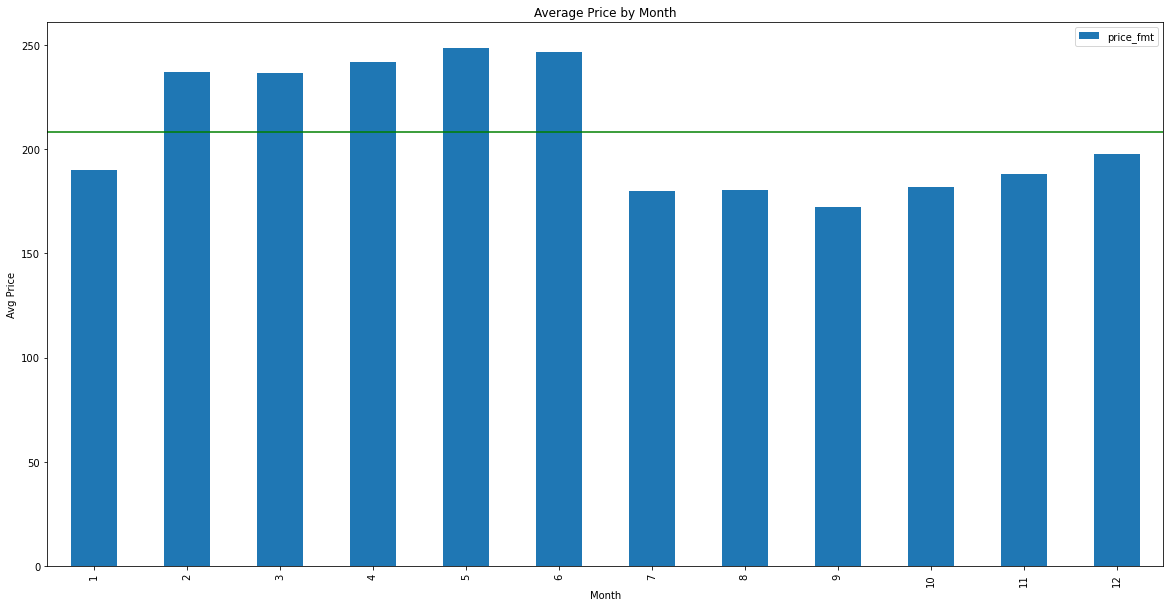

In [16]:
seasonality.plot(x='month_num', y='price_fmt', kind='bar',figsize=(20,10))# have increased fig size so it's easier to read
plt.axhline(y=seasonality['price_fmt'].mean(),color='green')# add a line to show the average
# add plot and axis titles
plt.title('Average Price by Month')
plt.xlabel('Month')
plt.ylabel('Avg Price')
plt.show() # display chart

Pricing seasonality isn't following what I expected. As the festival is in August, I expected that month to have the highest demand and also highest pricing - however May is the peak.

Let's crosstab room type against month and see if that gives a different picture.

### Prepare Data 1.2 - merge room type with calendar data, group and pivot

In [5]:
df_cal_merge = pd.merge(df_cal,df_listings1[['id','room_type']], left_on='listing_id', right_on='id', how='left') # merge on room type from the listings data frame
df_cal_merge = df_cal_merge.drop('id', axis=1) # drop the second ID column, unneccessary repeated data
agg_cal1 = df_cal_merge.groupby(['month_num', 'room_type'])['price_fmt'].mean().unstack().fillna(0) # group by month and room type, calculating the mean price for each combination
# unstack() is a great way to "pivot" out the data to display it better
# fillna(0) would set any instances to 0 if there was none of a particular room type in a particular month - turned out not to be necessary, even for low volume Shared room

### Business Understanding 1.4 - Deeper Dive into Pricing Seasonality using both Calendar and Listings data

In [7]:
# cross tab of room type vs avg price by month
agg_cal1

room_type,Entire home/apt,Hotel room,Private room,Shared room
month_num,,,,
1,190.267106,240.567178,188.395059,63.985806
2,260.211763,251.137656,190.858770,34.057143
3,260.261751,245.329471,190.503144,33.585806
4,266.437783,339.654369,189.252591,33.640000
5,272.920774,409.364861,192.705102,33.498065
6,276.786819,411.282848,179.227118,33.714667
7,203.129149,306.384278,128.477330,42.490323
8,206.062001,291.262136,124.547327,49.674839
9,174.099268,262.911974,165.032098,34.474667


In [18]:
agg_cal1.to_csv('crosstab.csv', index=True)

In [19]:
df_cal_merge.groupby(['room_type'])['price_fmt'].mean() # compare to mean by room_type

room_type
Entire home/apt    223.018474
Hotel room         295.413007
Private room       175.273029
Shared room         41.048877
Name: price_fmt, dtype: float64

Looks like price seasonality varies by room type?
Shared room is how I expected, peaks in December/January for Christmas/Hogmannay and a peak in August for festival. This room type also has the most extreme variances in price, with January and December 1.5 times the overall average.
February-June is peak price time for Entire home/apt.
Hotel peaks in May/June.
Private room is fairly consistently priced, with a dip in July/August (i.e. festival time)

# Let's try building a price prediction model

If I had a property in Edinburgh, could my model help me decide how to price it if I wanted to list on AirBnB?

Let's use the data in the listings dataframe to try and do this - although I need to remove some fields that don't make sense to include first.<br>
The columns which are categorical need to be converted into binary flags using get_dummies. <br>
I'll use a Regressor Decision Tree as the target variable is continous (price).<br>
And split into test/train (30/70) so I can see how it performs on unseen data and also check for overfit. <br>

### Prepare Data 1.3 - get the data ready for a baseline model

In [ ]:
# remove ids, empty column(neighbourhood group), and things we don't know before we list (review info)
df_model_data = df_listings1.drop(['id', 'name','host_id','host_name','neighbourhood_group','number_of_reviews','last_review','reviews_per_month'],axis=1) 
# use get dummies to turn text columns into binary flags
df_model_data = pd.get_dummies(df_model_data,columns=['neighbourhood','room_type'], drop_first=False)
y = df_model_data.pop('price') # pop out price to be the target variable
X = df_model_data # the rest of the columns are the predicitive features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)# split into train and test datasets, 70/30 split, set random state for reproducability

### Data Modelling 1.1 - baseline model

In [18]:
dtreeR = DecisionTreeRegressor() #instantiate decision tree
dtreeR.fit(X_train,y_train)# fit it on the training data
pred_R = dtreeR.predict(X_test) # predict on test data to see how well it works on unseen data
pred_tR = dtreeR.predict(X_train)# how does it predict on the training data, we can use this to check for overfit

### Evaluate Results 1.1 - baseline model

In [20]:
# model metrics
# test data
mseR = mean_squared_error(y_test,pred_R)
maeR = mean_absolute_error(y_test, pred_R)
medaeR = median_absolute_error(y_test, pred_R)
mapeR = mape(y_test, pred_R)

#training data
mseRt = mean_squared_error(y_train,pred_tR)
maeRt = mean_absolute_error(y_train, pred_tR)
medaeRt = median_absolute_error(y_train, pred_tR)
mapeRt = mape(y_train, pred_tR)

In [36]:
print("For the test data, mean squared error is " + str(mseR)+ " and mean absolute error is "+ str(maeR)+ " and median absolute error is " +str(medaeR)+" and mean absolute percentage error is "+str(mapeR))

For the test data, mean squared error is 450227.3982923154 and mean absolute error is 100.92616775489704 and median absolute error is 30.0 and mean absolute percentage error is 88.25145438425946


In [37]:
print("For the training data, mean squared error is " + str(mseRt)+ " and mean absolute error is "+ str(maeRt)+ " and median absolute error is " +str(medaeRt)+" and mean absolute percentage error is "+str(mapeRt))

For the training data, mean squared error is 2.092881757484385 and mean absolute error is 0.0757053629119104 and median absolute error is 0.0 and mean absolute percentage error is 0.0622321008245733


The mean absolute percentage error on the test data is pretty high and it is very low on the training data - it is over fitted to the training data. Also there is a big difference between the mean absolute error and the median absolute error on the test data - I think this suggests there are outliers skewing it?

Let's look at the feature importances too.

In [38]:
importances = pd.Series(dtreeR.feature_importances_, name='importance')
cols = pd.Series(X_test.columns, name='feature')
df_importance = pd.merge(cols, importances, right_index = True,left_index = True)
df_importance.sort_values(by=['importance'], ascending=False).head(20)

,feature,importance
0,latitude,0.659012
3,calculated_host_listings_count,0.121740
4,availability_365,0.119621
1,longitude,0.035771
87,"neighbourhood_Old Town, Princes Street and Lei...",0.017265
18,neighbourhood_Broughton South,0.010730
15,neighbourhood_Boswall and Pilton,0.010064
2,minimum_nights,0.005330
118,room_type_Private room,0.002906
58,neighbourhood_Hillside and Calton Hill,0.002433


Are there outliers in the price?

In [39]:
df_listings1.sort_values(by=['price'], ascending=False).head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2992,24058119,Beautiful Edinburgh Cottage with Parking,11362736,Sonia,NaN,Boswall and Pilton,55.97903,-3.21763,Entire home/apt,17626,1,18,2019-01-04,0.49,15,348
2702,21837493,Large Penthouse With Amazing City Views,159226863,Shauna,NaN,Western Harbour and Leith Docks,55.98496,-3.18876,Entire home/apt,17626,1,0,NaN,NaN,1,365
6234,49492800,"9/2 Albany Street, EDINBURGH",23701935,Sykes Holiday Cottages,NaN,"Old Town, Princes Street and Leith Street",55.95633,-3.19158,Entire home/apt,17626,2,0,NaN,NaN,1,365
3660,28508638,"Spacious apartment, Cumberland Street",11362736,Sonia,NaN,New Town West,55.95787,-3.20314,Entire home/apt,17626,1,15,2019-08-24,0.60,15,363
5223,40104817,Stunning three bedroom apartment,22185623,Dougie,NaN,Deans Village,55.95181,-3.20535,Entire home/apt,14515,1,0,NaN,NaN,1,247


Wow - £17,626 for one night that seems a bit high!

If I get the listing_url then I can look it up...

In [84]:
df_listings[df_listings['id']==24058119]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2992,24058119,https://www.airbnb.com/rooms/24058119,20210710030835,2021-07-10,Beautiful Edinburgh Cottage with Parking,Beautiful cottage in the city of Edinburgh wit...,NaN,https://a0.muscache.com/pictures/5afc6b7b-673d...,11362736,https://www.airbnb.com/users/show/11362736,...,5.0,4.78,4.89,NaN,t,15,15,0,0,0.49


This is a two bedroom cottage, it's lovely but not £17,626 per night lovely. I think I should remove the outliers and re-run the model.

### Prepare Data 1.4 - removing price outliers

The most common ways of removing outliers are either using z-score or interquartile ranges - I'll look at both and decide which makes most sense.

In [21]:
df_listings1['price'].describe()

count     6634.000000
mean       144.704402
std        523.968883
min          0.000000
25%         55.000000
50%         85.000000
75%        133.000000
max      17626.000000
Name: price, dtype: float64

In [42]:
z = np.abs(stats.zscore(df_listings1['price'])) # define z score

In [43]:
print("There are "+str(sum(z>=3))+" listings with z-score >=3")

There are 36 listings with z-score >=3


In [46]:
df_listings1['price'][(z>=3)].sort_values(ascending=False) # look at records

6234    17626
2702    17626
2992    17626
3660    17626
5223    14515
4819     6000
5746     3200
5736     3200
5737     3200
5738     3200
5951     3200
5743     3200
5744     3200
5745     3200
5739     3200
5747     3200
5761     3200
5950     3200
5939     3200
5933     3200
5935     3200
5936     3200
5937     3200
5938     3200
5755     3200
3708     3000
3813     3000
3424     2900
3399     2900
3388     2900
5793     2500
2172     2500
312      2270
660      1999
5821     1998
4318     1850
Name: price, dtype: int64

In [47]:
Q1 = df_listings1['price'].quantile(q=.25)
Q3 = df_listings1['price'].quantile(q=.75)
IQR = Q3 - Q1
upper = Q3+(1.5*IQR)


In [49]:
print("There are "+str(sum(df_listings1['price']>upper))+" listings greater than Q3 plus 1.5 IQR")

There are 501 listings greater than Q3 plus 1.5 IQR


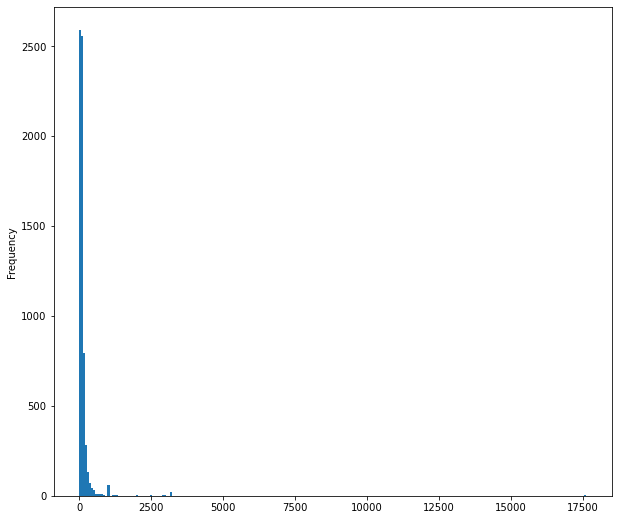

In [58]:
price = df_listings1['price']
price.plot(kind='hist', figsize=(10,9), bins=250)
plt.show()

In [55]:
sum(df_listings1['price']>upper)/df_listings1.shape[0]

0.07552004823635816

In [59]:
sum(z>=3)/df_listings1.shape[0]

0.005426590292432921

Using interquartile range to remove outliers would strip out nearly 8% of records, seems a bit extreme?
z-score approach is less than 1% - try this first as seems more reasonable

In [51]:
df_listings_nouts = df_listings1[(z<3)]

In [52]:
df_listings_nouts.shape

(6598, 16)

6634 - 36 = 6598 looks right

Now I'll run the model again without the outliers.

### Prepare Data 1.5 - preparing for second model iteration, outliers removed

In [ ]:
# remove ids, empty column, and things we don't know before we list - this time from the dataset with outliers removed - df_listings_nouts
df_model_data = df_listings_nouts.drop(['id', 'name','host_id','host_name','neighbourhood_group','number_of_reviews','last_review','reviews_per_month'],axis=1) 
# use get dummies to turn text columns into binary flags
df_model_data = pd.get_dummies(df_model_data,columns=['neighbourhood','room_type'], drop_first=False)
y1 = df_model_data.pop('price') # pop out price to be the target variable
X1 = df_model_data # the rest of the columns are the predicitive features
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=42)# split into train and test datasets, 70/30 split, set random state for reproducability

### Data Modelling 1.2 - second iteration, no price outliers included

In [53]:
dtree1 = DecisionTreeRegressor() #instantiate decision tree
dtree1.fit(X1_train,y1_train)# fit it on the training data
pred_2 = dtree1.predict(X1_test) # predict on test data to see how well it works on unseen data
pred_2t = dtree1.predict(X1_train) # predict on train data to check for overfit

### Evaluate Results 1.2 - second iteration, no price outliers included

In [54]:
# model metrics
# test data
mse1 = mean_squared_error(y1_test,pred_2)
mae1 = mean_absolute_error(y1_test, pred_2)
medae1 = median_absolute_error(y1_test, pred_2)
mape1 = mape(y1_test, pred_2)

#train data
mse1t = mean_squared_error(y1_train,pred_2t)
mae1t = mean_absolute_error(y1_train, pred_2t)
medae1t = median_absolute_error(y1_train, pred_2t)
mape1t = mape(y1_train, pred_2t)

In [55]:
print("For the test data, mean squared error is " + str(mse1)+ " and mean absolute error is "+ str(mae1)+ " and median absolute error is " +str(medae1)+" and mean absolute percentage error is "+str(mape1))

For the test data, mean squared error is 16868.147895622897 and mean absolute error is 63.256565656565655 and median absolute error is 30.0 and mean absolute percentage error is 69.70577388107088


In [56]:
print("For the test data, mean squared error is " + str(mse1t)+ " and mean absolute error is "+ str(mae1t)+ " and median absolute error is " +str(medae1t)+" and mean absolute percentage error is "+str(mape1t))

For the test data, mean squared error is 1.7152086040132812 and mean absolute error is 0.04366969828208459 and median absolute error is 0.0 and mean absolute percentage error is 0.028520478206553814


Now it is performing better on the test data, and the mean absolute error and median absolute error are a bit closer together. But it is still overfitting to the training data. Let's consider feature importances and whether I should reduce the number of features.

In [57]:
importances1 = pd.Series(dtree1.feature_importances_, name='importance')
cols1 = pd.Series(X1_test.columns, name='feature')
df_importance1 = pd.merge(cols1, importances1, right_index = True,left_index = True)
df_importance1.sort_values(by=['importance'], ascending=False).head(20)

,feature,importance
4,availability_365,0.222594
1,longitude,0.136124
3,calculated_host_listings_count,0.119881
0,latitude,0.116721
117,room_type_Hotel room,0.059477
2,minimum_nights,0.056940
118,room_type_Private room,0.052732
103,neighbourhood_South Leith,0.042195
106,neighbourhood_The Calders,0.040405
41,neighbourhood_Deans Village,0.013402


Do lattitude and longitude really make sense as features? And some of the neighbourhoods might be quite infrequently found, so maybe that is skewing things? <br>
Let's try a really cut down version with just these columns:<br>
- minimum_nights'<br>
- 'calculated_host_listings_count'<br>
- 'availability_365'<br>
- 'room_type_Entire home/apt'<br>
- 'room_type_Hotel room'<br>
- 'room_type_Private room'<br>
- 'room_type_Shared room'<br>

### Prepare Data 1.6 - preparing for 3rd model iteration, restricted features

In [ ]:
# remove ids, empty column, and things we don't know before we list - using no outliers dataset and restricting the final fields by excluding latitude, longitude and neighbourhood
df_model_data = df_listings_nouts.drop(['id', 'name','host_id','host_name','neighbourhood_group','number_of_reviews','last_review','reviews_per_month','latitude', 'longitude','neighbourhood'],axis=1) 
# use get dummies to turn text columns into binary flags
df_model_data = pd.get_dummies(df_model_data,columns=['room_type'], drop_first=False) # just for room type this time
y2 = df_model_data.pop('price') # pop out price to be the target variable
X2 = df_model_data # the rest of the columns are the predicitive features
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=42)# split into train and test datasets, 70/30 split, set random state for reproducability

### Data Modelling 1.3 - 3rd iteration, no outliers and restricted features

In [63]:
dtree2 = DecisionTreeRegressor() #instantiate decision tree
dtree2.fit(X2_train,y2_train)# fit it on the training data
pred_3 = dtree2.predict(X2_test) # predict on test data to see how well it works on unseen data
pred_train_2 = dtree2.predict(X2_train)

### Evaluate Results 1.3 - 3rd iterations, no outlieers and restricted features

In [64]:
mape3 = mape(y2_test, pred_3)
mape4 = mape(y2_train, pred_train_2)

In [65]:
mape3

65.66407899767005

In [66]:
mape4

22.844864722121763

That's better, performs better on test data and not so over-fitted to training data


How much does the model think I should charge for an entire home, available all year round, minimum booking 1 night?

In [67]:
dtree2.predict(np.array([1,1,365,1,0,0,0]).reshape(1, -1))

array([699.66666667])

What about a shared room, owned by someone with multiple listings, minimum booking 2 nights, available 180/365?

In [69]:
dtree2.predict(np.array([2,5,180,0,0,0,1]).reshape(1, -1))

array([35.])

# Conclusion

I think we are missing something which is probably one of the most important drivers of price - how many people does each listing sleep? Something suitable for a family of four would command a higher price than a place for a single person.

There is lots more I could do but I think I will leave it here. If I had more time I would look at new features and probably some model tuning, for example tree depth.